In [281]:
import pandas as pd
import datetime
from datetime import datetime as dt
from statistics import mean, median, stdev
import networkx as nx
from collections import defaultdict

In [3]:
stop_times = pd.read_csv('melb_bus_gtfs/stop_times.txt')
stop_times
# Units of `shape_dist_traveled` are unclear

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,1.T0.4-400-mjp-1.1.H,10:39:00,10:39:00,20947,1,NaN,0,0,0.00
1,1.T0.4-400-mjp-1.1.H,10:39:00,10:39:00,22562,2,NaN,0,0,356.44
2,1.T0.4-400-mjp-1.1.H,10:39:00,10:39:00,14870,3,NaN,0,0,680.27
3,1.T0.4-400-mjp-1.1.H,10:40:00,10:40:00,14871,4,NaN,0,0,1072.03
4,1.T0.4-400-mjp-1.1.H,10:41:00,10:41:00,14872,5,NaN,0,0,1468.95
...,...,...,...,...,...,...,...,...,...
2683042,9999.T0.4-765-mjp-1.6.R,16:54:17,16:54:17,11902,51,NaN,0,0,15742.92
2683043,9999.T0.4-765-mjp-1.6.R,16:54:41,16:54:41,11903,52,NaN,0,0,15856.12
2683044,9999.T0.4-765-mjp-1.6.R,16:55:12,16:55:12,11904,53,NaN,0,0,16002.76
2683045,9999.T0.4-765-mjp-1.6.R,16:56:34,16:56:34,9445,54,NaN,0,0,16436.92


In [ ]:
#shapes = pd.read_csv('melb_bus_gtfs/shapes.txt')
#shapes

In [4]:
trips = pd.read_csv('melb_bus_gtfs/trips.txt')
trips

,route_id,service_id,trip_id,shape_id,trip_headsign,direction_id
0,4-150-mjp-1,UW,177.UW.4-150-mjp-1.1.H,4-150-mjp-1.1.H,Williams Landing Station,0
1,4-150-mjp-1,UW,178.UW.4-150-mjp-1.1.H,4-150-mjp-1.1.H,Williams Landing Station,0
2,4-150-mjp-1,UW,179.UW.4-150-mjp-1.1.H,4-150-mjp-1.1.H,Williams Landing Station,0
3,4-150-mjp-1,UW,180.UW.4-150-mjp-1.1.H,4-150-mjp-1.1.H,Williams Landing Station,0
4,4-150-mjp-1,UW,181.UW.4-150-mjp-1.1.H,4-150-mjp-1.1.H,Williams Landing Station,0
...,...,...,...,...,...,...
65550,4-929-A-mjp-1,UW_3,84.UW.4-929-A-mjp-1.2.H,4-929-A-mjp-1.2.H,Pakenham North,0
65551,4-929-A-mjp-1,UW_3,85.UW.4-929-A-mjp-1.2.H,4-929-A-mjp-1.2.H,Pakenham North,0
65552,4-929-A-mjp-1,UW_3,86.UW.4-929-A-mjp-1.2.H,4-929-A-mjp-1.2.H,Pakenham North,0
65553,4-929-A-mjp-1,UW_3,87.UW.4-929-A-mjp-1.2.H,4-929-A-mjp-1.2.H,Pakenham North,0


In [5]:
routes = pd.read_csv('melb_bus_gtfs/routes.txt')
routes

,route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,4-150-mjp-1,NaN,150,Tarneit Station - Williams Landing Station,3,FF8200,FFFFFF
1,4-151-mjp-1,NaN,151,Tarneit Station - Williams Landing Station,3,FF8200,FFFFFF
2,4-153-mjp-1,NaN,153,Werribee Station - Williams Landing Station,3,FF8200,FFFFFF
3,4-160-mjp-1,NaN,160,Tarneit Station - Hoppers Crossing Station,3,FF8200,FFFFFF
4,4-161-mjp-1,NaN,161,Hoppers Crossing Station - Werribee Station,3,FF8200,FFFFFF
...,...,...,...,...,...,...,...
349,4-925-A-mjp-1,NaN,925,Lakeside - Pakenham Station,3,FF8200,FFFFFF
350,4-926-A-mjp-1,NaN,926,Pakenham Station - Fountain Gate SC,3,FF8200,FFFFFF
351,4-927-A-mjp-1,NaN,927,Pakenham North - Pakenham Station,3,FF8200,FFFFFF
352,4-928-A-mjp-1,NaN,928,Cardinia Road Station - Pakenham Station,3,FF8200,FFFFFF


## Processing each route to find its average speed and average distance between stops

In [164]:
def time_reduce(time):
    """Reduces time by three hours to ensure within datetime's limits"""
    hour = int(time[:2])
    hour -= 3
    return str(hour) + time[2:]

In [170]:
data = []
# Looping through each route
for route in routes.iloc:
    runs = trips[trips.route_id==route.route_id]
    # Looping through each route direction
    for direction in runs.direction_id.unique():
        trip_durations = []
        numbers_of_stops = []
        trip_distances = []
        # Looping through each run of that route - assuming they come in order
        for trip in runs[runs.direction_id==direction].trip_id:
            times = stop_times[stop_times.trip_id==trip]
            d = dt.strptime(time_reduce(times.iloc[0].departure_time), "%H:%M:%S")
            a = dt.strptime(time_reduce(times.iloc[-1].arrival_time), "%H:%M:%S")
            trip_durations.append((a-d).seconds/60)
            trip_distances.append(times.iloc[-1].shape_dist_traveled)
            numbers_of_stops.append(len(times))
        data.append([route.route_id, route.route_short_name, direction, 
                     runs[runs.direction_id==direction].iloc[0].trip_headsign, 
                     mean(trip_durations), mean(numbers_of_stops), mean(trip_distances)])
    print('+', end='')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [300]:
route_data = pd.DataFrame(data,
                          columns=['route_id', 'route_short_name', 'direction', 'direction_headsign', 
                                   'mean_duration', 'mean_n_stops', 'mean_distance'])

In [301]:
# Subtract 1 because it's the distance between stops
route_data['mean_dist_btwn_stops'] = route_data.mean_distance.divide(route_data.mean_n_stops-1)
route_data['mean_speed'] = route_data.mean_distance.divide(route_data.mean_duration)
route_data

,route_id,route_short_name,direction,direction_headsign,mean_duration,mean_n_stops,mean_distance,mean_dist_btwn_stops,mean_speed
0,4-150-mjp-1,150,0,Williams Landing Station,19.243243,23.000000,9953.430000,452.428636,517.242851
1,4-150-mjp-1,150,1,Tarneit Station,21.508929,23.000000,9706.280000,441.194545,451.267480
2,4-151-mjp-1,151,0,Williams Landing Station,22.758929,24.000000,10843.170000,471.442174,476.435873
3,4-151-mjp-1,151,1,Tarneit Station,26.297297,22.000000,10387.460000,494.640952,395.001048
4,4-153-mjp-1,153,0,Williams Landing Station,26.445783,20.445783,11148.266506,573.299950,421.551763
...,...,...,...,...,...,...,...,...,...
687,4-927-A-mjp-1,927,0,Pakenham Station,14.704225,13.000000,6454.720000,537.893333,438.970421
688,4-928-A-mjp-1,928,1,Cardinia Road Station,21.270270,19.000000,9290.640000,516.146667,436.789936
689,4-928-A-mjp-1,928,0,Pakenham Station,21.356164,18.000000,9516.600000,559.800000,445.613727
690,4-929-A-mjp-1,929,1,Pakenham Station,12.840000,14.000000,6243.360000,480.258462,486.242991


In [302]:
route_data.to_csv('route_stop_distance.csv')

## Scatter plot: do longer distances make a quicker journey?

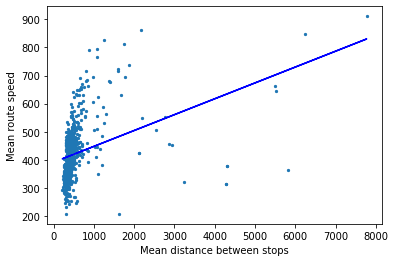

In [374]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr, pearsonr

x = numpy.array(route_data.mean_dist_btwn_stops).reshape((-1, 1))
y = numpy.array(route_data.mean_speed)
m = LinearRegression().fit(x, y)
print("r squared", m.score(x, y))

rho, p = spearmanr(route_data.mean_dist_btwn_stops, route_data.mean_speed)
print('spearman:', rho, 'p-value', p)

plt.scatter(route_data.mean_dist_btwn_stops, route_data.mean_speed, s=5)
plt.xlabel('Mean distance between stops')
plt.ylabel('Mean route speed')
plt.plot(x, m.predict(x), color='blue')
# Check the correlation of this
# I want to know which are the lowest and the highest

r squared 0.33838536409397724
spearman: 0.6218820446418853 p-value 8.25330198379419e-74


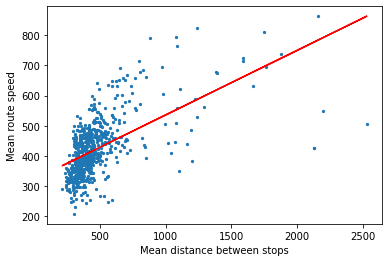

In [402]:
data_cleaned = route_data[route_data.mean_dist_btwn_stops < 2600]
data_cleaned = data_cleaned[data_cleaned.route_short_name != '401']
x = numpy.array(data_cleaned.mean_dist_btwn_stops).reshape((-1, 1))
y = numpy.array(data_cleaned.mean_speed)
m = LinearRegression().fit(x, y)
print("r squared", m.score(x, y))

rho, p = spearmanr(data_cleaned.mean_dist_btwn_stops, data_cleaned.mean_speed)
print('spearman:', rho, 'p-value', p)

plt.scatter(data_cleaned.mean_dist_btwn_stops, data_cleaned.mean_speed, s=5)
plt.xlabel('Mean distance between stops')
plt.ylabel('Mean route speed')
plt.plot(x, m.predict(x), color='red')

In [353]:
#from scipy.stats import pearsonr
#r, p = pearsonr(route_data.mean_dist_btwn_stops, route_data.mean_speed)
#r, p

(0.3712123630088849, 4.941970432235673e-24)

## Finding distance between each stop and its connected stops

In [171]:
# Generating network
nodes = defaultdict(dict)
# Looping through each route
for route in routes.iloc:
    runs = trips[trips.route_id==route.route_id]
    # Looping through each route direction
    for direction in runs.direction_id.unique():
        # Looping through each run of that route - assuming they come in order
        for trip in runs[runs.direction_id==direction].trip_id:
            times = stop_times[stop_times.trip_id==trip]
            for i in range(len(times)-1):
                s0 = times.iloc[i]
                s1 = times.iloc[i+1]
                nodes[s0.stop_id][s1.stop_id] = s1.shape_dist_traveled - s0.shape_dist_traveled
    print('+', end='')

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

KeyboardInterrupt: 

In [212]:
# More efficient method
c = 0
nodes_new = defaultdict(dict)
last_id = stop_times.iloc[0].trip_id
last_stop_id = stop_times.iloc[0].stop_id
last_dist = stop_times.iloc[0].shape_dist_traveled
last_seq = stop_times.iloc[0].stop_sequence
for s in stop_times.iloc:
    c += 1
    if c == 10000:
        print('+', end='')
        c = 0
    # Continuation of run: it's been checked that all sequences within trips are ascending
    if s.trip_id == last_id:
        nodes_new[last_stop_id][s.stop_id] = s.shape_dist_traveled - last_dist
    else:
        last_id = s.trip_id
    last_stop_id = s.stop_id
    last_dist = s.shape_dist_traveled
    last_seq = s.stop_sequence

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [340]:
# Gets mean distance from each stop to its neighbours
data = {}
for n in nodes_new:
    vals = [v for v in nodes_new[n].values() if not numpy.isnan(v)]
    if not vals:
        print('n', n)
        continue
    data[n] = mean(vals)
data

n 15998
n 16577


{20947: 523.6433333333339,
 22562: 323.83,
 14870: 391.76,
 14871: 396.9200000000001,
 14872: 264.46000000000004,
 14873: 280.29999999999995,
 14874: 568.2799999999997,
 14875: 872.1450000000002,
 22291: 839.6300000000001,
 22293: 386.8099999999995,
 22295: 646.5100000000002,
 22306: 687.6300000000001,
 22307: 373.3000000000002,
 22309: 1639.12,
 22343: 1472.1849999999995,
 47619: 780.6100000000006,
 46422: 1198.8400000000001,
 48431: 816.0599999999995,
 22344: 1331.9349999999995,
 48540: 1894.0,
 51393: 880.369999999999,
 22345: 2059.2850000000017,
 47613: 405.1499999999978,
 46436: 477.6200000000026,
 40303: 394.9399999999987,
 40304: 296.4599999999991,
 40305: 288.84000000000015,
 40306: 225.45999999999913,
 40307: 258.84000000000015,
 21605: 317.77000000000044,
 21608: 259.3100000000013,
 21610: 255.38999999999942,
 21802: 1487.4599999999991,
 47617: 789.0699999999997,
 5004: 1730.9850000000006,
 5005: 321.380000000001,
 5006: 250.75,
 5007: 269.91999999999825,
 5008: 262.880000000

In [350]:
# Constructs Data Frame and saves
pd.DataFrame(data.items(), columns=['stop_id','mean_distance']).to_csv('distance_between_stops.csv', index=False)

In [231]:
# A few nans found - will have to be ignored
import numpy

for h in nodes_new:
    i = nodes_new[h]
    for v in i.values():
        if numpy.isnan(v):
            print(h, i, v)

15998 {19611: nan} nan
19611 {11324: nan, 3525: 544.5299999999988} nan
17396 {17395: 307.5500000000002, 17390: nan} nan
21010 {22299: 569.79, 15871: nan} nan
15871 {15872: 259.10000000000036, 15881: nan} nan
15881 {15883: 551.5199999999986, 19811: nan} nan
16577 {17490: nan} nan
17490 {17491: 637.3999999999996, 17496: nan} nan


In [399]:
# Equivalent to making a graph using nx
# Outlier is route to Eildon - 27252.52 from East Melb to Ringwood
all_dists = [v for h in nodes_new.values() for v in h.values() if not numpy.isnan(v) and v < 1500]
mean(all_dists)
#mean(nx.get_edge_attributes(g, 'weight').values())

393.7764341590613

In [400]:
stdev(all_dists)

221.9190322168738

In [401]:
median(all_dists)

332.77000000000004

(array([1.9116e+04, 9.5600e+02, 1.4100e+02, 6.5000e+01, 3.7000e+01,
        2.4000e+01, 1.9000e+01, 1.2000e+01, 8.0000e+00, 6.0000e+00,
        6.0000e+00, 1.1000e+01, 4.0000e+00, 6.0000e+00, 4.0000e+00,
        1.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([    0.        ,   908.41733333,  1816.83466667,  2725.252     ,
         3633.66933333,  4542.08666667,  5450.504     ,  6358.92133333,
         7267.33866667,  8175.756     ,  9084.17333333,  9992.59066667,
        10901.008     , 11809.42533333, 12717.84266667, 13626.26      ,
        14534.67733333, 15443.09466667, 16351.512     , 17259.92933333,
        18168.34666667, 19076.764     , 19985.18133333, 20893.59866667,
        21802.016     , 22710.43333333, 23618.85066667, 24527.268     ,
        25435.68533333, 26344.10266667, 27252.52      ]),
 <BarContainer object of 30 

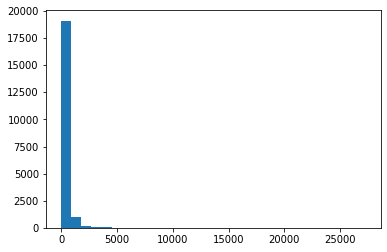

In [285]:
plt.hist(all_dists, bins=30)

(array([2.710e+02, 5.898e+03, 6.819e+03, 3.271e+03, 1.553e+03, 8.660e+02,
        5.080e+02, 3.050e+02, 2.200e+02, 1.080e+02, 1.010e+02, 7.600e+01,
        5.800e+01, 3.300e+01, 2.600e+01, 2.000e+01, 2.700e+01, 2.000e+01,
        1.500e+01, 1.500e+01, 5.000e+00, 2.100e+01, 1.100e+01, 1.000e+01,
        7.000e+00, 5.000e+00, 7.000e+00, 8.000e+00, 6.000e+00, 5.000e+00]),
 array([   0.   ,  132.807,  265.614,  398.421,  531.228,  664.035,
         796.842,  929.649, 1062.456, 1195.263, 1328.07 , 1460.877,
        1593.684, 1726.491, 1859.298, 1992.105, 2124.912, 2257.719,
        2390.526, 2523.333, 2656.14 , 2788.947, 2921.754, 3054.561,
        3187.368, 3320.175, 3452.982, 3585.789, 3718.596, 3851.403,
        3984.21 ]),
 <BarContainer object of 30 artists>)

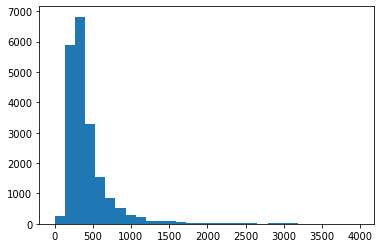

In [284]:
plt.hist([a for a in all_dists if a < 4000], bins=30)

Text(0.5, 0, 'Distance between stops (unknown units)')

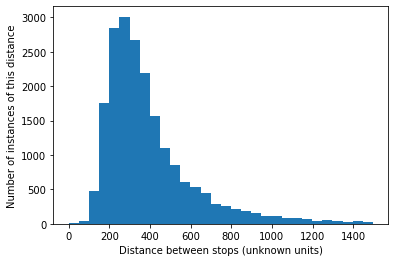

In [286]:
plt.hist([a for a in all_dists if a < 1500], bins=30)
plt.ylabel('Number of instances of this distance')
plt.xlabel('Distance between stops (unknown units)')

In [233]:
# NetworkX
#g = nx.from_dict_of_lists(nodes_new)
#g
#from matplotlib import pyplot as plt
#plt.figure(1,figsize=(20,20))
#nx.draw_networkx(g)

## Scratch space for investigating the data

In [329]:
# Finding anomalous distances
for h in nodes_new:
    i = nodes_new[h]
    for v in i.values():
        if v <15 :
            print(h, i, v)

20947 {20947: 0.0, 22562: 356.44, 20949: 1214.4900000000016} 0.0
16394 {16369: 10.020000000000437} 10.020000000000437
39631 {11526: 0.0} 0.0
13254 {40279: 5.0} 5.0
12073 {40261: 4.1299999999992} 4.1299999999992
51316 {51314: 1.0} 1.0
22350 {19232: 2.240000000000691, 18865: 846.8099999999995} 2.240000000000691


In [236]:
all_stops = pd.read_csv("melb_bus_gtfs/stops.txt", index_col='stop_id')
all_stops

,stop_name,stop_lat,stop_lon
stop_id,,,
1000,Dole Ave/Cheddar Rd (Reservoir),-37.700775,145.018951
10001,Rex St/Taylors Rd (Kings Park),-37.726975,144.776152
10002,Yuille St/Centenary Ave (Melton),-37.676160,144.595789
10009,Gum Rd/Main Rd West (Albanvale),-37.741497,144.775899
1001,Lloyd Ave/Cheddar Rd (Reservoir),-37.699183,145.019685
...,...,...,...
9991,Donald St/Wood St (Preston),-37.735366,145.022375
9992,Highview Rd/Wood St (Preston),-37.735117,145.019886
9993,Plenty Rd/Wood St (Preston),-37.734460,145.014014


In [346]:
# Stops associated with nan distances and other weird things
#stop_times[numpy.isnan(stop_times.shape_dist_traveled)]
#stop_times[numpy.isnan(stop_times.shape_dist_traveled)].stop_id.unique()
all_stops.loc[[19611, 17396, 21010, 15871, 15881, 17490, 13254, 40279, 22350, 19232, 15998, 16577]]

,stop_name,stop_lat,stop_lon
stop_id,,,
19611,Mentone Station/Como Pde (Mentone),-37.981949,145.064799
17396,Governor Rd/Industrial Dr (Braeside),-38.007050,145.112636
21010,Blackburn Station/South Pde (Blackburn),-37.820472,145.150333
15871,Ray Rd/Blackburn Rd (Burwood East),-37.854883,145.151690
15881,Syndal Station/Blackburn Rd (Glen Waverley),-37.875785,145.147870
17490,Boundary Rd/Redwood Dr (Dingley Village),-37.983896,145.110815
13254,Park Rd/Stony Point Rd (Crib Point),-38.364076,145.201542
40279,Crib Point Station/Stony Point Rd (Crib Point),-38.364272,145.201399
22350,Reservoir Station/Edwardes St (Reservoir),-37.716729,145.006807


In [342]:
all_stops.loc[[20947, 20947, 39631, 11526, 21010, 19811, 22022, 51316, 51314]]

,stop_name,stop_lat,stop_lon
stop_id,,,
20947,Laverton Station/Maher Rd (Laverton),-37.863695,144.770741
20947,Laverton Station/Maher Rd (Laverton),-37.863695,144.770741
39631,Darling Rd/Princes Hwy (Malvern East),-37.883847,145.058740
11526,Darling Rd/Princes Hwy (Malvern East),-37.883856,145.058740
21010,Blackburn Station/South Pde (Blackburn),-37.820472,145.150333
19811,Monash University (Clayton),-37.914073,145.131702
22022,Caulfield Railway Station/Sir John Monash Dr (...,-37.877344,145.043153
51316,Mountainview Bvd/William Thwaites Bvd (Cranbou...,-38.078850,145.315719
51314,Aspera Pl/William Thwaites Bvd (Cranbourne North),-38.078859,145.315708


In [324]:
for i in range(len(stop_times)-1):
    s0 = stop_times.iloc[i]
    s1 = stop_times.iloc[i+1]
    if s0.trip_id == s1.trip_id and s0.shape_dist_traveled == s1.shape_dist_traveled:
        print(s0)
        print(s1)

trip_id                1276.T0.4-624-mjp-1.12.R
arrival_time                           08:32:00
departure_time                         08:32:00
stop_id                                   39631
stop_sequence                                18
stop_headsign                               NaN
pickup_type                                   0
drop_off_type                                 0
shape_dist_traveled                     4734.27
Name: 150730, dtype: object
trip_id                1276.T0.4-624-mjp-1.12.R
arrival_time                           08:32:00
departure_time                         08:32:00
stop_id                                   11526
stop_sequence                                19
stop_headsign                               NaN
pickup_type                                   0
drop_off_type                                 0
shape_dist_traveled                     4734.27
Name: 150731, dtype: object
trip_id                1277.T0.4-624-mjp-1.13.R
arrival_time                    

KeyboardInterrupt: 

In [326]:
stop_times[stop_times.trip_id=='1276.T0.4-624-mjp-1.12.R']

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
150713,1276.T0.4-624-mjp-1.12.R,08:20:00,08:20:00,22022,1,NaN,0,0,0.00
150714,1276.T0.4-624-mjp-1.12.R,08:23:00,08:23:00,22023,2,NaN,0,0,621.21
150715,1276.T0.4-624-mjp-1.12.R,08:23:00,08:23:00,22012,3,NaN,0,0,1144.45
150716,1276.T0.4-624-mjp-1.12.R,08:23:00,08:23:00,22010,4,NaN,0,0,1441.42
150717,1276.T0.4-624-mjp-1.12.R,08:24:00,08:24:00,22008,5,NaN,0,0,1823.26
150718,1276.T0.4-624-mjp-1.12.R,08:24:00,08:24:00,22007,6,NaN,0,0,1990.59
150719,1276.T0.4-624-mjp-1.12.R,08:25:00,08:25:00,22005,7,NaN,0,0,2195.78
150720,1276.T0.4-624-mjp-1.12.R,08:27:00,08:27:00,22003,8,NaN,0,0,2493.68
150721,1276.T0.4-624-mjp-1.12.R,08:29:00,08:29:00,22001,9,NaN,0,0,2836.09
150722,1276.T0.4-624-mjp-1.12.R,08:30:00,08:30:00,21999,10,NaN,0,0,3096.28


In [398]:
route_data[route_data.direction_headsign=='Eildon']

,route_id,route_short_name,direction,direction_headsign,mean_duration,mean_n_stops,mean_distance,mean_dist_btwn_stops,mean_speed
420,4-684-mjp-1,684,0,Eildon,167.5,20.625,152556.46375,7773.577771,910.784858
